In [32]:
pip install jaal

     ---------------------------------------- 4.5/4.5 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 197.3/197.3 kB ? eta 0:00:00
     ------------------------------------- 518.8/518.8 kB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 10.4/10.4 MB 32.8 MB/s eta 0:00:00
  Created wheel for visdcc: filename=visdcc-0.0.50-py3-none-any.whl size=518238 sha256=334de6b9111380c47d5b203e40a64c56a3f0302dafea5683e1b29b4011d2e815
  Stored in directory: c:\users\timur\appdata\local\pip\cache\wheels\00\6c\41\6a1aa49eef394570dd8c040da559c8ee154a4582a8786ec152
Successfully built visdcc
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Import packages

import pandas as pd
import numpy as np
import pymrio
import openpyxl
import os
from scipy import linalg as lg
import networkx as nx
import pyreadr 
import matplotlib.pyplot as plt
import jaal
import dash_html_components as html
from dash import html
from jaal import Jaal
from jaal.datasets import load_got
from sklearn.preprocessing import MinMaxScaler



In [3]:
# folder with input files

fldr = "C:/Users/timur/OneDrive/The Paper_OECD/"

In [3]:
# Read RData for Mc

#df1 = pyreadr.read_r(fldr+'Mc.RData')
#Mc = df1['Mc']
#Mc.shape

In [4]:
# Create list of countries oecd and non-oecd

country_oecd = pd.read_excel(io = "http://stats.oecd.org/wbos/fileview2.aspx?IDFile=927334dd-d497-4f58-bc5f-40b7cc9b0468",
                            sheet_name = 'Country_Industry',
                            header = None,
                            names = ['alpha-3', 'country'],
                            usecols = "B:C",
                            skiprows = 3,
                            nrows = 44-4)
country_oecd["country_group"] = "oecd"

print(country_oecd.head())

country_nonoecd = pd.read_excel(io = "http://stats.oecd.org/wbos/fileview2.aspx?IDFile=927334dd-d497-4f58-bc5f-40b7cc9b0468",
                            sheet_name = 'Country_Industry',
                            header = None,
                            names = ['alpha-3', 'country'],
                            usecols = "D:E",
                            skiprows = 3,
                            nrows = 35-4)

country_nonoecd["country_group"] = "non-oecd"

print(country_nonoecd.head())


countries = pd.concat([country_oecd, country_nonoecd])

print(countries)


C:\Users\timur\anaconda3\lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: ColItems!$A:$E.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\timur\anaconda3\lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: RowItems!$A:$E.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


  alpha-3    country country_group
0     AUS  Australia          oecd
1     AUT    Austria          oecd
2     BEL    Belgium          oecd
3     CAN     Canada          oecd
4     CHL      Chile          oecd
  alpha-3            country country_group
0     ARG          Argentina      non-oecd
1     BRA             Brazil      non-oecd
2     BRN  Brunei Darussalam      non-oecd
3     BGR           Bulgaria      non-oecd
4     KHM           Cambodia      non-oecd
   alpha-3            country country_group
0      AUS          Australia          oecd
1      AUT            Austria          oecd
2      BEL            Belgium          oecd
3      CAN             Canada          oecd
4      CHL              Chile          oecd
..     ...                ...           ...
26     TWN     Chinese Taipei      non-oecd
27     THA           Thailand      non-oecd
28     TUN            Tunisia      non-oecd
29     VNM           Viet Nam      non-oecd
30     ROW  Rest of the World      non-oecd

[71

C:\Users\timur\anaconda3\lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: ColItems!$A:$E.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\timur\anaconda3\lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: RowItems!$A:$E.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


In [5]:
# Remove '.1' from Country names

# Remove '.1 from country names'
countries["country"] = countries["country"].str.strip('.1')
countries["country"] = countries["country"].str.strip('.2')


In [6]:
# Check countries dataframe 

#print(countries.loc[countries.country_group=="oecd","country"])

print(np.array(countries.loc[:,"country"]).reshape(-1, 1))

[['Australia']
 ['Austria']
 ['Belgium']
 ['Canada']
 ['Chile']
 ['Colombia']
 ['Costa Rica']
 ['Czech Republic - Czechia']
 ['Denmark']
 ['Estonia']
 ['Finland']
 ['France']
 ['Germany']
 ['Greece']
 ['Hungary']
 ['Iceland']
 ['Ireland']
 ['Israel']
 ['Italy']
 ['Japan']
 ['Korea']
 ['Latvia']
 ['Lithuania']
 ['Luxembourg']
 ['Mexico']
 ['Mexico - Activities excluding Global Manufacturing']
 ['Mexico - Global Manufacturing activities']
 ['Netherlands']
 ['New Zealand']
 ['Norway']
 ['Poland']
 ['Portugal']
 ['Slovak Republic']
 ['Slovenia']
 ['Spain']
 ['Sweden']
 ['Switzerland']
 ['Turkey']
 ['United Kingdom']
 ['United States']
 ['Argentina']
 ['Brazil']
 ['Brunei Darussalam']
 ['Bulgaria']
 ['Cambodia']
 ["China (People's Republic of)"]
 ['China - Activities excluding export processing']
 ['China - Export processing activities']
 ['Croatia']
 ['Cyprus']
 ['India']
 ['Indonesia']
 ['Hong Kong, China']
 ['Kazakhstan']
 ["Lao People's Democratic Republic"]
 ['Malaysia']
 ['Malta']
 ['

In [7]:
MVc = pd.read_excel(io = fldr + 'Resultados1995_2018.xlsx',
                    sheet_name = 'MVc',
                    usecols = "BY:EQ",
                    nrows = 1679,
                    header = 0,
                    index_col = (0,1),
                    decimal = ',',
                    engine = 'openpyxl'
                   )
MVc.index.names = ['year', 'country']

C:\Users\timur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
# Test the data frame with results

#print(MVc.index)

print(MVc.loc[(1995, 'Brazil'),])

Argentina.1          0.295967
Australia.1          0.031551
Austria.1            0.024643
Belgium.1            0.083313
Brazil.1            38.725433
                      ...    
Tunisia.1             0.04929
Turkey.1              0.02312
United Kingdom.1     0.040779
United States.1      0.048452
Viet Nam.1           0.055237
Name: (1995, Brazil), Length: 69, dtype: object


In [9]:
print(MVc.index.get_level_values('country').unique())



countries['country'].values

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China - Activities excluding export processing',
       'China - Export processing activities', 'Chinese Taipei', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus2', 'Czech Republic - Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel1', 'Italy', 'Japan', 'Kazakhstan', 'Korea',
       'Lao People's Democratic Republic', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Malta',
       'Mexico - Activities excluding Global Manufacturing',
       'Mexico - Global Manufacturing activities', 'Morocco', 'Myanmar',
       'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Rest of the World', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Singapore', 'Slovak Republic

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic - Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Mexico',
       'Mexico - Activities excluding Global Manufacturing',
       'Mexico - Global Manufacturing activities', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Argentina', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia',
       "China (People's Republic of)",
       'China - Activities excluding export processing',
       'China - Export processing activities', 'Croatia', 'Cyprus',
       'India', 'Indonesia', 'Hong Kong, China', 'Kazakhstan',
       "Lao People's Democratic Republic", 'Malaysia', 'Malta', 'Moro

In [10]:
# Remove '.1 from country names'
MVc.columns = MVc.columns.str.strip('.1')
MVc.columns = MVc.columns.str.strip('.2')
MVc.index = MVc.index.set_levels(MVc.index.levels[1].str.replace('1', ''), level = 1)
MVc.index = MVc.index.set_levels(MVc.index.levels[1].str.replace('2', ''), level = 1)

In [11]:
# Remove line which is used to separate each year in excel file
MVc.drop('A', level = 1, axis = 0, inplace = True)

In [12]:
# Convert non-numeric values to numeric values
MVc = MVc.apply(pd.to_numeric, errors='coerce')

In [13]:
# Check if the country names are matching

for i in MVc.index.get_level_values('country').unique(): 
    if i in countries['country'].values:
        print(i, countries[countries['country']==i]['alpha-3'].values[0])
    else: 
        print(i, "is not there!!!!!!!!!!!!!!!!!!!!!!!!!!")

Argentina ARG
Australia AUS
Austria AUT
Belgium BEL
Brazil BRA
Brunei Darussalam BRN
Bulgaria BGR
Cambodia KHM
Canada CAN
Chile CHL
China - Activities excluding export processing CN1
China - Export processing activities CN2
Chinese Taipei TWN
Colombia COL
Costa Rica CRI
Croatia HRV
Cyprus CYP
Czech Republic - Czechia CZE
Denmark DNK
Estonia EST
Finland FIN
France FRA
Germany DEU
Greece GRC
Hong Kong, China HKG
Hungary HUN
Iceland ISL
India IND
Indonesia IDN
Ireland IRL
Israel ISR
Italy ITA
Japan JPN
Kazakhstan KAZ
Korea KOR
Lao People's Democratic Republic LAO
Latvia LVA
Lithuania LTU
Luxembourg LUX
Malaysia MYS
Malta MLT
Mexico - Activities excluding Global Manufacturing MX1
Mexico - Global Manufacturing activities MX2
Morocco MAR
Myanmar MMR
Netherlands NLD
New Zealand NZL
Norway NOR
Peru PER
Philippines PHL
Poland POL
Portugal PRT
Rest of the World ROW
Romania ROU
Russian Federation RUS
Saudi Arabia SAU
Singapore SGP
Slovak Republic SVK
Slovenia SVN
South Africa ZAF
Spain ESP
Sweden

Create edges and nodes dataframes for visualization

In [14]:
# Node

node_df = pd.DataFrame({'id':countries["country"], 
                      'alpha-3':countries["alpha-3"],
                       'country_group':countries["country_group"]})
print(node_df)

                   id alpha-3 country_group
0           Australia     AUS          oecd
1             Austria     AUT          oecd
2             Belgium     BEL          oecd
3              Canada     CAN          oecd
4               Chile     CHL          oecd
..                ...     ...           ...
26     Chinese Taipei     TWN      non-oecd
27           Thailand     THA      non-oecd
28            Tunisia     TUN      non-oecd
29           Viet Nam     VNM      non-oecd
30  Rest of the World     ROW      non-oecd

[71 rows x 3 columns]


In [15]:
# Edge all

df3 = MVc.reset_index(inplace = False)

df3 = pd.melt(MVc.reset_index(inplace = False), id_vars = ['year', 'country'], var_name = 'to', value_name = 'weight')

df3.rename(columns={'country':'from'}, inplace = True)

# Add a column which shows if the weight shows intrac company trade 
df3['intra'] = df3.apply(lambda row:1 if row ['from'] == row['to'] else 0, axis = 1)

edge_df = df3

In [16]:
edge_df.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018], dtype=int64)

In [18]:
#Filter nodes

year_select = 2017  #1995 - 2018

country_A = "Germany"

weight_percentile = 5



In [19]:
# Create filtered dataframe based on filters

edge_df_filtered = edge_df.loc[((edge_df['to'] == country_A) | (edge_df['from'] == country_A)) & 
                               (edge_df['intra'] == 0) &
                               (edge_df['year'] == year_select) &
                                 (edge_df['weight'] > 
                                  np.percentile(edge_df.loc[(edge_df['year']==year_select) &
                                            ((edge_df['to'] == country_A) | (edge_df['from'] == country_A)) &
                                            (edge_df['intra'] == 0),'weight'], weight_percentile)), 
                               edge_df.columns != 'intra']

# Exclude revenue within a country

edge_df_filtered = edge_df_filtered.drop(edge_df_filtered.loc[edge_df_filtered['from'] == edge_df_filtered['to']].index)

# Add a marker for direction of a flow

edge_df_filtered['direction'] = edge_df_filtered.apply(lambda row:'from' if row ['from'] == country_A else 'to', axis = 1)

# Normalize weight for range between 1 and 10
edge_df_filtered['weight_norm'] = MinMaxScaler(feature_range=(1, 10)).fit_transform(edge_df_filtered[['weight']])



In [20]:
viz = Jaal(edge_df_filtered, node_df).plot(vis_opts={'physics':{'stabilization':{'iterations': 100}}}, 
                                     directed = True) # define the convergence iteration of network


Parsing the data...Done


No trigger
Modifying edge size using  weight_norm
inside color node country_group


{'Argentina': Text(0.028845777069762272, 0.5545054134182817, 'Argentina'),
 'Australia': Text(-0.1653753692551494, -0.13589678545578307, 'Australia'),
 'Austria': Text(-0.26155792456645993, -0.16468473675753836, 'Austria'),
 'Belgium': Text(0.0431009654246915, -0.057200537746086494, 'Belgium'),
 'Brazil': Text(0.15968213700140751, 0.6577140087831255, 'Brazil'),
 'Brunei Darussalam': Text(0.9882304712800769, -0.2581273916997231, 'Brunei Darussalam'),
 'Bulgaria': Text(0.24679359067355, 0.6115126562477494, 'Bulgaria'),
 'Cambodia': Text(-0.3937655926451635, 0.6540018211726135, 'Cambodia'),
 'Canada': Text(0.09793048920058783, 0.19431810506096042, 'Canada'),
 'Chile': Text(-0.030386108622974452, 0.6331471509238065, 'Chile'),
 'China - Activities excluding export processing': Text(0.06478366042160041, -0.5244413181995301, 'China - Activities excluding export processing'),
 'China - Export processing activities': Text(0.226076999666892, -0.9161561606507791, 'China - Export processing activi

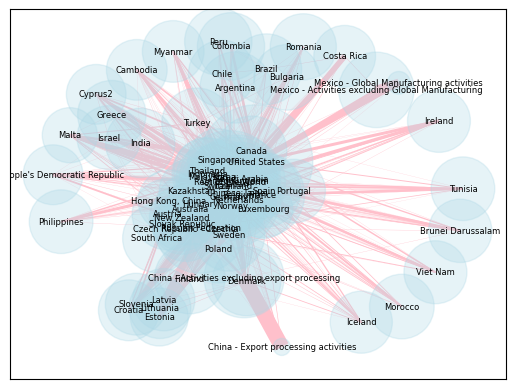

In [16]:
G = nx.DiGraph()

# Add nodes
for country in MVc.loc[1995].index.get_level_values('Country').unique():
    G.add_node(country)

# Add edges
for country1 in MVc.loc[1995].index.get_level_values('Country').unique():
    for country2 in MVc.loc[1995].columns:
        weight = MVc.loc[(1995, country1), country2]
        if weight > 0 and country1 != country2:  # Add edge if weight is positive and not linking node with itself
            G.add_edge(country1, country2, weight=weight)

# Keep only top 20% of edges by weight
edge_weights = nx.get_edge_attributes(G, 'weight')
edge_weights_sorted = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
num_edges_to_keep = int(len(edge_weights_sorted) * 0.2)
edges_to_keep = [edge[0] for edge in edge_weights_sorted[:num_edges_to_keep]]
G = G.edge_subgraph(edges_to_keep)

# Remove direction arrows and change edge width to reflect weight
pos = nx.spring_layout(G, k=4/np.sqrt(len(G.nodes())), iterations=300)
node_weights = {}
for country in G.nodes():
    node_weights[country] = MVc.loc[(1995, country)].sum()
nx.draw_networkx_nodes(G, pos, alpha=0.3, node_color='lightblue', node_size=[60 * node_weights[country] for country in G.nodes()])
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='pink', arrows=False, width=[G[u][v]['weight'] for u, v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')

# Display the plot

#plt.figure(figsize=(5, 5))
#plt.gca().set_facecolor('white')
#plt.axis('off')
#plt.savefig('MVc_1.png', dpi=400, format='png', bbox_inches = 'tight')
#plt.show()

In [121]:
G = nx.DiGraph()

print(G.edges)

[]


In [152]:
MVc.loc[1995].index.get_level_values('Country').unique()

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China - Activities excluding export processing',
       'China - Export processing activities', 'Chinese Taipei', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus2', 'Czech Republic - Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel1', 'Italy', 'Japan', 'Kazakhstan', 'Korea',
       'Lao People's Democratic Republic', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Malta',
       'Mexico - Activities excluding Global Manufacturing',
       'Mexico - Global Manufacturing activities', 'Morocco', 'Myanmar',
       'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Rest of the World', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Singapore', 'Slovak Republic

In [151]:
print(countries['Country'].to_string())

oecd     0                                             Australia
         1                                               Austria
         2                                               Belgium
         3                                                Canada
         4                                                 Chile
         5                                              Colombia
         6                                            Costa Rica
         7                              Czech Republic - Czechia
         8                                               Denmark
         9                                               Estonia
         10                                              Finland
         11                                               France
         12                                              Germany
         13                                               Greece
         14                                              Hungary
         15              

In [157]:
for country in MVc.loc[1995].index.get_level_values('Country').unique():
    alpha3 = countries[countries['Country']==country]['alpha-3'][0]
    G.add_node(alpha3)
print(G.nodes)

['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BRN', 'BGR', 'KHM', 'CAN', 'CHL', 'CN1', 'CN2', 'TWN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRL', 'ISR', 'ITA', 'JPN', 'KAZ', 'KOR', 'LAO', 'LVA', 'LTU', 'LUX', 'MYS', 'MLT', 'MX1', 'MX2', 'MAR', 'MMR', 'NLD', 'NZL', 'NOR', 'PER', 'PHL', 'POL', 'PRT', 'ROW', 'ROU', 'RUS', 'SAU', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'SWE', 'CHE', 'THA', 'TUN', 'TUR', 'GBR', 'USA', 'VNM']


In [39]:
# Add edges
for country1 in MVc.loc[1995].index.get_level_values('Country').unique():
    for country2 in MVc.loc[1995].columns:
        weight = MVc.loc[(1995, country1), country2]
        if weight > 0 and country1 != country2:  # Add edge if weight is positive and not linking node with itself
            G.add_edge(country1, country2, weight=round(weight,4))


In [46]:
nx.get_edge_attributes(G,'weight')[('Argentina','Australia')]

0.009